In [1]:
import pandas as pd
import numpy as np
import IPython.display

data = pd.read_csv('./data/filtered_data.csv', usecols=['Id','Title', 'Body', 'Tags'], index_col='Id')
data.reset_index(inplace=True)
data.drop(columns='Id', inplace=True)
data.head(10)

,Title,Body,Tags
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<blockquote>\n <p><strong>Moderator note:</st...,<javascript><ecmascript-6>
1,Git is not working after macOS Update (xcrun: ...,<p>I updated to macOS Mojave (this happens on ...,<xcode><git><macos><command-line><terminal>
2,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>
3,Xcode 10 Error: Multiple commands produce,<blockquote>\n <p>error: Multiple commands pr...,<info.plist><xcode10>
4,"Why does array[idx++]+=""a"" increase idx once i...","<p>For a challenge, <a href=""https://stackover...",<java><java-8><javac><java-9><java-10>
5,Difference between npx and npm?,"<p>I have just started learning React, and Fac...",<javascript><npm><npx>
6,Cannot inline bytecode built with JVM target 1...,<p>When trying to run the Example CorDapp (<a ...,<android><intellij-idea><kotlin><jvm><corda>
7,"Could not find module ""@angular-devkit/build-a...","<p>After updating to Angular 6.0.1, I get the ...",<angular><angular-cli><angular6><angular-cli-v6>
8,"How to fix ""ReferenceError: primordials is not...",<p>I have installed Node.js modules by 'npm in...,<node.js><sass><gulp><gulp-sass>
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,<p>I was practicing some JavaScript when one o...,<javascript><type-conversion>


## Constitution du corpus 

In [2]:
%%time
data['Post'] = data.apply(lambda x: x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body'], axis=1)
corpus = data['Post'].to_list()
tags = data['Tags'].to_list()

print("Dix première observations")
display(data.head(10))

print("Premier élément de la liste corpus\n")
display(corpus[0])
print("\n")

print("Premier éléments de la liste tags\n")
display(tags[0])

print(f"Occurences dans le corpus: {len(corpus)}")
print(f"Occurences dans les tags: {len(tags)}")

Dix première observations


,Title,Body,Tags,Post
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<blockquote>\n <p><strong>Moderator note:</st...,<javascript><ecmascript-6>,Can (a== 1 && a ==2 && a==3) ever evaluate to ...
1,Git is not working after macOS Update (xcrun: ...,<p>I updated to macOS Mojave (this happens on ...,<xcode><git><macos><command-line><terminal>,Git is not working after macOS Update (xcrun: ...
2,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>,Why is 2 * (i * i) faster than 2 * i * i in Ja...
3,Xcode 10 Error: Multiple commands produce,<blockquote>\n <p>error: Multiple commands pr...,<info.plist><xcode10>,Xcode 10 Error: Multiple commands produce <blo...
4,"Why does array[idx++]+=""a"" increase idx once i...","<p>For a challenge, <a href=""https://stackover...",<java><java-8><javac><java-9><java-10>,"Why does array[idx++]+=""a"" increase idx once i..."
5,Difference between npx and npm?,"<p>I have just started learning React, and Fac...",<javascript><npm><npx>,Difference between npx and npm? <p>I have just...
6,Cannot inline bytecode built with JVM target 1...,<p>When trying to run the Example CorDapp (<a ...,<android><intellij-idea><kotlin><jvm><corda>,Cannot inline bytecode built with JVM target 1...
7,"Could not find module ""@angular-devkit/build-a...","<p>After updating to Angular 6.0.1, I get the ...",<angular><angular-cli><angular6><angular-cli-v6>,"Could not find module ""@angular-devkit/build-a..."
8,"How to fix ""ReferenceError: primordials is not...",<p>I have installed Node.js modules by 'npm in...,<node.js><sass><gulp><gulp-sass>,"How to fix ""ReferenceError: primordials is not..."
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,<p>I was practicing some JavaScript when one o...,<javascript><type-conversion>,Why is the result of ('b'+'a'+ + 'a' + 'a').to...


Premier élément de la liste corpus



'Can (a== 1 && a ==2 && a==3) ever evaluate to true? <blockquote>\n  <p><strong>Moderator note:</strong> Please resist the urge to edit the code or remove this notice. The pattern of whitespace may be part of the question and therefore should not be tampered with unnecessarily. If you are in the "whitespace is insignificant" camp, you should be able to accept the code as is.</p>\n</blockquote>\n\n<p>Is it ever possible that <code>(a== 1 &amp;&amp; a ==2 &amp;&amp; a==3)</code> could evaluate to <code>true</code> in JavaScript?</p>\n\n<p>This is an interview question asked by a major tech company. It happened two weeks back, but I\'m still trying to find the answer. I know we never write such code in our day-to-day job, but I\'m curious.</p>\n'



Premier éléments de la liste tags



'<javascript><ecmascript-6>'

Occurences dans le corpus: 46504
Occurences dans les tags: 46504
CPU times: user 639 ms, sys: 288 ms, total: 927 ms
Wall time: 922 ms


## Nettoyage HTML

In [3]:
%%time

def clean_html(text):
    """
    Remove HTML from a text.
    
    Args:
        text(String): Row text with html 
             
    Returns:
        cleaned String
    """
    import lxml
    import html5lib
    from bs4 import BeautifulSoup
 
    soup = BeautifulSoup(text, "html5lib")

    for sent in soup(['style', 'script']):
            sent.decompose()
   
        
    return ' '.join(soup.stripped_strings)

corpus_wo_html = [clean_html(text) for text in corpus]

print("Premier élément de la liste corpus sans html\n")
display(corpus_wo_html[0])
print("\n")

print(f"Occurences dans le corpus: {len(corpus_wo_html)}")

Premier élément de la liste corpus sans html



'Can (a== 1 && a ==2 && a==3) ever evaluate to true? Moderator note: Please resist the urge to edit the code or remove this notice. The pattern of whitespace may be part of the question and therefore should not be tampered with unnecessarily. If you are in the "whitespace is insignificant" camp, you should be able to accept the code as is. Is it ever possible that (a== 1 && a ==2 && a==3) could evaluate to true in JavaScript? This is an interview question asked by a major tech company. It happened two weeks back, but I\'m still trying to find the answer. I know we never write such code in our day-to-day job, but I\'m curious.'



Occurences dans le corpus: 46504
CPU times: user 1min 5s, sys: 251 ms, total: 1min 5s
Wall time: 1min 5s


### Nettoyage du texte

In [5]:
%%time

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text. 
    
    Args:
        text(String): Row text to clean
        
    Returns:
       res(string): Cleaned text
    """
    import re
    
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text
    
    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res))
    res = " ".join(res)
    return res

cleaned_corpus = [text_cleaning(text) for text in corpus_wo_html]
cleaned_tags = [text_cleaning(text).strip() for text in tags]


print("Premier élément de la liste cleaned_corpus\n")
display(cleaned_corpus[0])
print("\n")

print("Premier élément de la liste cleaned_tags\n")
display(cleaned_tags[0])
print("\n")

print(f"Occurences dans le corpus nettoyé: {len(cleaned_corpus)}")
print(f"Occurences dans les tags nettoyés: {len(cleaned_tags)}")

Premier élément de la liste cleaned_corpus



'ever evaluate true moderator note please resist urge edit code remove this notice pattern whitespace part question therefore should tampered with unnecessarily whitespace insignificant camp should able accept code ever possible that could evaluate true javascript this interview question asked major tech company happened weeks back still trying find answer know never write such code curious'



Premier élément de la liste cleaned_tags



'javascript ecmascript'



Occurences dans le corpus nettoyé: 46504
Occurences dans les tags nettoyés: 46504
CPU times: user 7.09 s, sys: 130 ms, total: 7.22 s
Wall time: 7.22 s


### Tokenization

In [6]:
%%time
def tokenize(text):
    """
    Tokenize words of a text.
    
    Args:
    
        text(String): Row text
        
    Returns
    
        res(list): Tokenized string.
    """
    
    from nltk.corpus import stopwords
    from nltk import word_tokenize
    from nltk.tokenize import sent_tokenize

    stop_words = set(stopwords.words('english'))
    
    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    res = [token for token in res if token not in stop_words]
    return res

tokenized_corpus = [tokenize(text) for text in cleaned_corpus]
tokenized_tags = [tokenize(text) for text in cleaned_tags]

print("Premier élément de la liste tokenized_corpus\n")
display(tokenized_corpus[0])
print("\n")
print(f"Longueur du premier éléments de liste tokenized_corpus: {len(tokenized_corpus[0])}")
print("\n")

print("Premier élément de la liste tokenized_tags\n")
display(tokenized_tags[0])
print('\n')


print(f"Occurences dans le corpus tokenizé: {len(tokenized_corpus)}")
print(f"Occurences dans la liste des tags: {len(tokenized_tags)}")

Premier élément de la liste tokenized_corpus



['ever',
 'evaluate',
 'true',
 'moderator',
 'note',
 'please',
 'resist',
 'urge',
 'edit',
 'code',
 'remove',
 'notice',
 'pattern',
 'whitespace',
 'part',
 'question',
 'therefore',
 'tampered',
 'unnecessarily',
 'whitespace',
 'insignificant',
 'camp',
 'able',
 'accept',
 'code',
 'ever',
 'possible',
 'could',
 'evaluate',
 'true',
 'javascript',
 'interview',
 'question',
 'asked',
 'major',
 'tech',
 'company',
 'happened',
 'weeks',
 'back',
 'still',
 'trying',
 'find',
 'answer',
 'know',
 'never',
 'write',
 'code',
 'curious']



Longueur du premier éléments de liste tokenized_corpus: 49


Premier élément de la liste tokenized_tags



['javascript', 'ecmascript']



Occurences dans le corpus tokenizé: 46504
Occurences dans la liste des tags: 46504
CPU times: user 31.9 s, sys: 1.75 s, total: 33.7 s
Wall time: 32.5 s


## Filtrage des noms à l'aide d'un modèle de POS tagging

In [7]:
%%time 
def filtering_nouns(tokens):
    """
    Filter singular nouns
    
    Args:
        tokens(list): A list o tokens
        
    
    Returns:
    
        res(list): Filtered token list
    """ 
    
    import nltk
    
    res = nltk.pos_tag(tokens)
    
    res = [token[0] for token in res if token[1] == 'NN']
    
    return res

noun_corpus = [filtering_nouns(tokens) for tokens in tokenized_corpus]

print("Premier élément de la liste noun_corpus\n")
display(noun_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste noun_corpus: {len(noun_corpus[0])}")
print("\n")


print(f"Occurences dans le corpus tokenizé: {len(noun_corpus)}")

Premier élément de la liste noun_corpus



['moderator',
 'note',
 'please',
 'edit',
 'code',
 'notice',
 'pattern',
 'part',
 'question',
 'whitespace',
 'insignificant',
 'camp',
 'accept',
 'code',
 'javascript',
 'interview',
 'question',
 'tech',
 'company',
 'answer',
 'code']



Longueur du premier éléments de liste noun_corpus: 21


Occurences dans le corpus tokenizé: 46504
CPU times: user 3min 33s, sys: 458 ms, total: 3min 33s
Wall time: 3min 33s


## Lemmatisation

In [8]:
%%time
def lemmatization(tokens):
    """
    Transform tokens into lems 
    
    Args:
        tokens(list): List of tokens
        
    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    import nltk
    from nltk.stem import WordNetLemmatizer
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        
    return lemmatized

lemmatized_corpus = [lemmatization(tokens) for tokens in noun_corpus]
lemmatized_tags = [lemmatization(tokens) for tokens in tokenized_tags]

tags_wo_blanks = []
for tokens in lemmatized_tags:
    tokens = [token for token in tokens if len(token)>1]
    tags_wo_blanks.append(tokens)

print("Premier élément de la liste lemmatized_corpus\n")
display(lemmatized_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste lemmatized_corpus: {len(lemmatized_corpus[0])}")
print("\n")

print("Premier élément de la liste lemmatized_tags\n")
display(tags_wo_blanks[0])


print(f"Occurences dans le corpus lemmatisé: {len(lemmatized_corpus)}")
print(f"Occurences dans les tags lemmatisés: {len(tags_wo_blanks)}")

Premier élément de la liste lemmatized_corpus



['moderator',
 'note',
 'please',
 'edit',
 'code',
 'notice',
 'pattern',
 'part',
 'question',
 'whitespace',
 'insignificant',
 'camp',
 'accept',
 'code',
 'javascript',
 'interview',
 'question',
 'tech',
 'company',
 'answer',
 'code']



Longueur du premier éléments de liste lemmatized_corpus: 21


Premier élément de la liste lemmatized_tags



['javascript', 'ecmascript']

Occurences dans le corpus lemmatisé: 46504
Occurences dans les tags lemmatisés: 46504
CPU times: user 7.78 s, sys: 39.8 ms, total: 7.82 s
Wall time: 7.82 s


### Filtrage des valeurs vides

In [9]:
joined_corpus = [" ".join(text) for text in lemmatized_corpus]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in tags_wo_blanks]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[(corpus_tag_df['len_text']==0) | (corpus_tag_df['len_tags']==0)].index

corpus_tag_df.drop(index=empty_data_idx, inplace=True)
data.drop(index=empty_data_idx, inplace=True)

print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")
print(f"Observations restante du corpus original: {data.shape[0]}")


corpus_tag_df['splitted_text'] = corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_tags'] = corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = data['Post'].to_list()

filtered_tokenized_vs_original = pd.concat([data['Post'],
                                            corpus_tag_df['splitted_text'], 
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)

filtered_tokenized_vs_original.to_csv("./data/cleaned_corpus.csv", index=False)
filtered_tokenized_vs_original.to_pickle('./data/cleaned_corpus.pkl')

filtered_tokenized_vs_original.head(10)

observations restantes du corpus traité: 45902
Observations restante du corpus original: 45902


,Post,splitted_text,splitted_tags
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,"[moderator, note, please, edit, code, notice, ...","[javascript, ecmascript]"
1,Git is not working after macOS Update (xcrun: ...,"[macos, error, developer, path, developer, the...","[xcode, macos, command, line, terminal]"
2,Why is 2 * (i * i) faster than 2 * i * i in Ja...,"[java, program, void, string, args, starttime,...","[java, performance, benchmarking, bytecode]"
3,Xcode 10 Error: Multiple commands produce <blo...,"[xcode, error, error, developer, deriveddata, ...","[info, plist, xcode]"
4,"Why does array[idx++]+=""a"" increase idx once i...","[increase, java, challenge, code, code, import...","[java, java, javac, java, java]"
5,Difference between npx and npm? <p>I have just...,"[difference, react, facebook, setup, project, ...",[javascript]
6,Cannot inline bytecode built with JVM target 1...,"[inline, bytecode, target, bytecode, target, e...","[android, intellij, idea, kotlin, corda]"
7,"Could not find module ""@angular-devkit/build-a...","[devkit, error, serve, devkit, home, error, de...","[angular, angular, angular, angular]"
8,"How to fix ""ReferenceError: primordials is not...","[referenceerror, node, sas, watch, command, pr...","[node, sas, gulp, gulp, sas]"
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,"[result, tolowercase, banana, javascript, java...","[javascript, type, conversion]"


## Fréquence de distribution tokens

In [10]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution
    
    Args:
        Corpus(List of lists): Original corpus
    
    Returns:
        
        word_dist_df(DataFrame): Word distribution of the corpus
    """
    
    from nltk import FreqDist
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

word_dist = build_word_distribution(filtered_corpus)

print(f"Nombre de tokens du corpus {word_dist.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist.head(20))

Nombre de tokens du corpus 114368
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,45866
error,42385
class,33214
name,31687
file,30291
import,27868
code,25715
version,23367
http,22633


CPU times: user 1.17 s, sys: 39.9 ms, total: 1.21 s
Wall time: 1.21 s


## Fréquence de distribution des tags

In [11]:
tag_dist = build_word_distribution(filtered_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist.head(20))
print(f"Nombre de tags: {len(tag_dist)}")
first_200_tags = tag_dist[0:200].index.to_list()

Top 20 des tags les plus utilisés


,Frequency
Word,
python,8987
android,6782
angular,5306
javascript,5205
java,3727
reactjs,3475
flutter,3092
spring,3004
react,2822


Nombre de tags: 6141


In [12]:
'command' in first_200_tags

False

### filtrage top 200 tags

In [13]:
filtered_corpus_tag_df = corpus_tag_df.copy()
filtered_corpus_tag_df['tags_in_top200'] = filtered_corpus_tag_df['splitted_tags'].apply(lambda tags: [tag for tag in tags if tag in first_200_tags])

filtered_corpus_tag_df['len_tags_in_top200'] = filtered_corpus_tag_df['tags_in_top200'].apply(lambda x: len(x))
missing_filtered_data = filtered_corpus_tag_df[filtered_corpus_tag_df['len_tags_in_top200'] == 0].index

filtered_corpus_tag_df.drop(index=missing_filtered_data, inplace=True)
data.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {filtered_corpus_tag_df.shape[0]}")
print(f"Observations restantes dans le corpus original: {data.shape[0]}")

top200_corpus = filtered_corpus_tag_df['splitted_text'].to_list()
top200_joined_corpus = filtered_corpus_tag_df['preprocessed_text'].to_list()
top200_tags = filtered_corpus_tag_df['tags_in_top200'].to_list()

Observations restantes dans le coprus traité: 43132
Observations restantes dans le corpus original: 43132


### Fréquences de distribution des tokens après filtrage du top 200 tags

In [14]:
word_dist_top200 = build_word_distribution(top200_corpus)
print(f"Nombre de tokens du corpus {word_dist_top200.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist_top200.head(20))
word_dist_top200[word_dist_top200["Frequency"]>=1000].shape[0]

Nombre de tokens du corpus 109012
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,45220
error,40145
class,31994
name,30387
file,28857
import,27434
code,24251
version,22440
http,21656


456

### Fréquences de distribution des tags après filtrage du top 200 tags

In [15]:
tag_dist_top_200 = build_word_distribution(top200_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist_top_200.head(20))
print(f"Nombre de tags: {len(tag_dist_top_200)}")

Top 20 des tags les plus utilisés


,Frequency
Word,
python,8987
android,6782
angular,5306
javascript,5205
java,3727
reactjs,3475
flutter,3092
spring,3004
react,2822


Nombre de tags: 200


### TF-IDF

In [147]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = list(word_dist_top200[word_dist_top200["Frequency"]>=1000].index)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(top200_joined_corpus)
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.head(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

filename_tfidf_model = './models/tfidf_model.pkl'
pickle.dump(tfidf_vectorizer, open(filename_tfidf_model, 'wb'))

filename_vocabulary = "./models/vocabulary.pkl"
pickle.dump(vocabulary, open(filename_vocabulary, 'wb'))

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,class,name,file,import,code,version,http,value,...,deployment,metadata,policy,report,bucket,place,threadpoolexecutor,commit,protocol,scroll
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.453515,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.142134,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.189486,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.147381,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.188345,0.000000,0.0,0.0,0.000000,0.065783,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.648035,0.000000,0.090941,0.0,0.0,0.050598,0.271276,0.050404,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.096007,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.026193,0.000000,0.0,0.0,0.000000,0.000000,0.035695,0.03338,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.360222,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Nombre d'observations: 43132, nombre de variables: 456
CPU times: user 1.17 s, sys: 120 ms, total: 1.29 s
Wall time: 1.29 s


### Dédoublonnage des labels

In [19]:
dedup_tags = []
for tags in top200_tags:
    dedup_tags.append(set(tags))

print('Affichage de la première occurence de dedup_tags')
display(dedup_tags[0])

Affichage de la première occurence de dedup_tags


{'ecmascript', 'javascript'}

### Partition des données

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, dedup_tags, test_size=0.2, random_state=42)

## Réduction des données

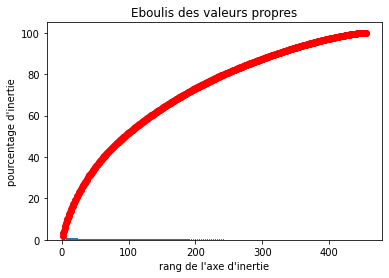

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(random_state=42)
pca.fit(X_train)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

In [48]:
import pickle 

pca = PCA(n_components=0.85, random_state=42)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)
print(f"Nombre de composantes principales: {pca.components_.shape[0]}")

filename_pca_model = './models/pca_model.pkl'
pickle.dump(pca, open(filename_pca_model, 'wb'))

Nombre de composantes principales: 281


## Vectorisaton des labels

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
import pickle 

mlb = MultiLabelBinarizer(classes=first_200_tags)
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

print("Affichage des classes du modèle de vectorisation")
display(mlb.classes_)

filename_mlb_model = './models/mlb_model.pkl'
pickle.dump(mlb, open(filename_mlb_model,'wb'))

Affichage des classes du modèle de vectorisation


array(['python', 'android', 'angular', 'javascript', 'java', 'reactjs',
       'flutter', 'spring', 'react', 'core', 'google', 'studio', 'docker',
       'node', 'typescript', 'amazon', 'dart', 'laravel', 'native',
       'visual', 'html', 'azure', 'firebase', 'swift', 'boot', 'service',
       'panda', 'material', 'cloud', 'kubernetes', 'code', 'xcode',
       'apache', 'kotlin', 'json', 'django', 'window', 'gradle',
       'tensorflow', 'framework', 'selenium', 'macos', 'data', 'mysql',
       'swiftui', 'server', 'testing', 'webpack', 'bootstrap', 'linux',
       'spark', 'kera', 'chrome', 'component', 'learning', 'array',
       'ubuntu', 'hook', 'form', 'compose', 'http', 'image', 'router',
       'numpy', 'vuejs', 'github', 'mongodb', 'postgresql', 'function',
       'layout', 'dataframe', 'jupyter', 'ionic', 'jquery', 'jenkins',
       'rest', 'opencv', 'entity', 'express', 'redux', 'navigation',
       'plugin', 'pipeline', 'maven', 'machine', 'ruby', 'powershell',
       'auth

### Fonction d'évaluation des modèles

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

models_performance = {}

def metrics_report(model_name, test_labels, predictions, performances):
    """
    Compute performance metrics of a model and store them in a dictionary
    
    Args:
        model_name(string): name of the evaluated model
        test_labels(array): labels related to predictors
        preductions(array): predicted results
        performances(dict): used dictionary to store metrics
    Returns:
        performances(dict): used dictionary to store metrics filed with models ones
    """    
    accuracy = accuracy_score(test_labels, predictions)
    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')
    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + model_name + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    
    performances[model_name] = {}
    performances[model_name]["micro_precision"] =  micro_precision
    performances[model_name]["micro_recall"] = micro_recall
    performances[model_name]["micro_f1"] = micro_f1
    
    return performances

### KNN

In [27]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_transformed, train_labels)
knn_predictions = knn_clf.predict(X_test_transformed)
metrics_report("knn", test_labels, knn_predictions, models_performance)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------knn Model Metrics-----
Accuracy: 0.1163
Hamming Loss: 0.0099
Precision:
  - Macro: 0.4801
  - Micro: 0.6880
Recall:
  - Macro: 0.1746
  - Micro: 0.2814
F1-measure:
  - Macro: 0.2355
  - Micro: 0.3995
CPU times: user 46.6 s, sys: 17.1 s, total: 1min 3s
Wall time: 38.1 s


{'knn': {'micro_precision': 0.6879980680994928,
  'micro_recall': 0.2814383088017386,
  'micro_f1': 0.39946719012899606}}

### SVM

In [28]:
%%time
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(X_train_transformed, train_labels)

svm_preds = svm_clf.predict(X_test_transformed)
metrics_report("svm", test_labels, svm_preds, models_performance)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------svm Model Metrics-----
Accuracy: 0.1479
Hamming Loss: 0.0087
Precision:
  - Macro: 0.4482
  - Micro: 0.7986
Recall:
  - Macro: 0.1880
  - Micro: 0.3424
F1-measure:
  - Macro: 0.2420
  - Micro: 0.4793
CPU times: user 6.79 s, sys: 13 s, total: 19.8 s
Wall time: 22.5 s


{'knn': {'micro_precision': 0.6879980680994928,
  'micro_recall': 0.2814383088017386,
  'micro_f1': 0.39946719012899606},
 'svm': {'micro_precision': 0.7986407095956687,
  'micro_recall': 0.3424380124469031,
  'micro_f1': 0.4793445569882809}}

### Random Forest

In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train_transformed, train_labels)
rf_preds = rf_clf.predict(X_test_transformed)
metrics_report("Random Forest", test_labels, rf_preds, models_performance)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Random Forest Model Metrics-----
Accuracy: 0.0617
Hamming Loss: 0.0103
Precision:
  - Macro: 0.2921
  - Micro: 0.8686
Recall:
  - Macro: 0.0456
  - Micro: 0.1469
F1-measure:
  - Macro: 0.0707
  - Micro: 0.2513
CPU times: user 44min 18s, sys: 12.6 s, total: 44min 31s
Wall time: 2min 59s


{'knn': {'micro_precision': 0.6879980680994928,
  'micro_recall': 0.2814383088017386,
  'micro_f1': 0.39946719012899606},
 'svm': {'micro_precision': 0.7986407095956687,
  'micro_recall': 0.3424380124469031,
  'micro_f1': 0.4793445569882809},
 'Random Forest': {'micro_precision': 0.8685747663551402,
  'micro_recall': 0.1468932134742665,
  'micro_f1': 0.2512885509083228}}

### Gradient boosting

In [30]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

gb_clf = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf.fit(X_train_transformed, train_labels)
gb_preds = gb_clf.predict(X_test_transformed)
metrics_report("Gradient Boosting", test_labels, gb_preds, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.0816
Hamming Loss: 0.0117
Precision:
  - Macro: 0.2616
  - Micro: 0.5055
Recall:
  - Macro: 0.1760
  - Micro: 0.3074
F1-measure:
  - Macro: 0.2048
  - Micro: 0.3823
CPU times: user 14h 49min 39s, sys: 636 ms, total: 14h 49min 40s
Wall time: 14h 49min 39s


{'knn': {'micro_precision': 0.6879980680994928,
  'micro_recall': 0.2814383088017386,
  'micro_f1': 0.39946719012899606},
 'svm': {'micro_precision': 0.7986407095956687,
  'micro_recall': 0.3424380124469031,
  'micro_f1': 0.4793445569882809},
 'Random Forest': {'micro_precision': 0.8685747663551402,
  'micro_recall': 0.1468932134742665,
  'micro_f1': 0.2512885509083228},
 'Gradient Boosting': {'micro_precision': 0.5054829014702299,
  'micro_recall': 0.30736935691000694,
  'micro_f1': 0.38228337991829714}}

### Synthèse des résultats

In [37]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.687998,0.281438,0.399467
svm,0.798641,0.342438,0.479345
Random Forest,0.868575,0.146893,0.251289
Gradient Boosting,0.505483,0.307369,0.382283


In [139]:
import pickle
filename_svm_model = './models/svm_model.pkl'
pickle.dump(svm_clf, open(filename_svm_model,'wb'))

### Fonction de prédiction

In [118]:
%%time
def predict_supervised_tags(supervised_model, mlb_model, text):
    """
    Predict tags according to a lemmatized text using a supervied model.
    
    Args:
        supervised_model(): Used mode to get prediction
        mlb_model(): Used model to detransform
    Returns:
        res(list): List of predicted tags
    """
    res = tfidf_vectorizer.transform(text)
    res = pd.DataFrame(res.toarray(), columns=vocabulary)
    res = pca.transform(res)
    res = supervised_model.predict(res)
    res = mlb.inverse_transform(res)
    res = list({tag for tag_list in res for tag in tag_list if (len(tag_list) != 0)})
    res = [tag for tag  in res if tag in text]
    
    return res

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


### Fonction de vérification

In [137]:
def check_tag_predction(original_text, original_tags, preprocessed_text, model):
    """
    Check original tags vs predicted tags for a post.
    
    Args:
        post(list) : original text
        original_tags(list) : preprocessed_tags
    """
    
    predicted_tags = predict_supervised_tags(model, mlb, preprocessed_text)
    print("Publication originale: \n")
    print(f"{original_text}")
    print("\n")
    print(f"Liste des tags pré-traités utilisés par l'utilisateur: {original_tags}")
    print("\n")
    print(f"Liste des tags prédits par le modèle: {predicted_tags}")

check_tag_predction(filtered_tokenized_vs_original.loc[0,'Post'], 
                filtered_tokenized_vs_original.loc[0,'splitted_tags'],
                filtered_tokenized_vs_original.loc[0,'splitted_text'],
                svm_clf)

Publication originale: 

Can (a== 1 && a ==2 && a==3) ever evaluate to true? <blockquote>
  <p><strong>Moderator note:</strong> Please resist the urge to edit the code or remove this notice. The pattern of whitespace may be part of the question and therefore should not be tampered with unnecessarily. If you are in the "whitespace is insignificant" camp, you should be able to accept the code as is.</p>
</blockquote>

<p>Is it ever possible that <code>(a== 1 &amp;&amp; a ==2 &amp;&amp; a==3)</code> could evaluate to <code>true</code> in JavaScript?</p>

<p>This is an interview question asked by a major tech company. It happened two weeks back, but I'm still trying to find the answer. I know we never write such code in our day-to-day job, but I'm curious.</p>



Liste des tags pré-traités utilisés par l'utilisateur: ['javascript', 'ecmascript']


Liste des tags prédits par le modèle: ['javascript', 'code']


## Méthode non supervisée

### Recherche du modèle yant l'indice de cohérence maximum

In [ ]:
%%time 

import gensim
from gensim.models import TfidfModel
import gensim.corpora as corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Args:
  
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max num of topics

    Returns:
    
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    
    for num_topics in range(start, limit, step):
        
        model = LdaMulticore(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics, 
                            random_state=42,
                            passes=10,
                            workers=7)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

data = pd.read_pickle("./data/cleaned_corpus.pkl")
texts = data['splitted_text'].to_list()
id2word = corpora.Dictionary(texts)
id2word.filter_extremes(no_below=1000)
bow_corpus = [id2word.doc2bow(text) for text in texts]
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = [tfidf[text] for text in bow_corpus]

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=tfidf_corpus, texts=texts, start=2, limit=51, step=1)


limit=51; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))